# Palmer Penguins

My analysis of the Palmer Penguins dataset. For this analysis I will be using data imported from the Seaborn repository on Github, this data has already been cleaned so I will not be cleaning the data here.

![Palmer Penguins artwork](https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png)
Artwork by @allison_horst

In [18]:
# Data Frames
import pandas as pd

#numpy
import numpy as np

#Plotting
import matplotlib.pyplot as plt

%matplotlib inline

from matplotlib import style 


In [19]:
#Load the penguins dataset
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

## Overview of the Dataset

The Palmer Penguins dataset contains information about three penguin species observed on three islands in the Palmer Archipelago in Antarctica.

The data was collected between 2007 and 2009 by Dr. Kristen Gormen for the Palmer Station Long Term Ecological Research Program.

The data was collected as part of research to study Antarctic penguins’ foraging behavior and its relationship with environmental variability.

## Overview of the Variables
### Variable 1: Species
This variable identifies the species of the penguin.
There are only three possible inputs within the species variable:
    * Adelie
    * Chinstrap 
    * Gentoo
For this reason, and because the data is not numeric, the best data type for this variable is a string.

### Variable 2: Island
This variable tells us which island the penguin was spotted on.
There are only three posible outputs for this variable also:
    * Biscoe
    * Dream
    * Torgersen
Similar to Species, the best variable type for this dataset is string.

### Variables 3 & 4: Bill Length and Bill Depth
The culmen is the upper ridge of a penguin's bill. In the simplified penguins data, culmen length and depth are renamed as variables bill_length_mm and bill_depth_mm for clarity. These variables measure, in millimeters, the dimensions of the penguin's bill. 
The most appropriate data type for these variables is floats, as they deal with precise numerical measurements, using decimals.

For this penguin data, the culmen (bill) length and depth are measured as shown below:
INSERT PIC OF BILL

### Variables 5: Flipper Length
This variable measures the length of the penguin's flipper in millimeters.
The most appropriate data type for this variable is integer, as all of the results within this section are positve, whole numbers. It would also be possible to use floats for this variable, howver it is preferable to use integers whenever possible due to the limited precision and loss of accuracy that an occur when using floats.

### Variables 6: Body mass 
This variable measures the mass of each penguin in grams.
Similar to Flipper length the most appropriate variable for this data type is also integer, due to all results being positive, whole numbers.

### Variables 7: Sex
This variable measures the sex of the penguins, whether they are male or female.
The best data type for this variable, in this analysis, is a String. It would also be possible to use Booleans here, as there are only 2 options for the variable.

### Variables 8: Year
This variable describes the year that each penguin was spotted.
For this analysis, because year is merely used as an identifier and we will not be performing any calculations with this variable, strings are the most appropriate variable.


### Create a bar chart of an appropriate variable
Species, island, sex, year

In [20]:
#count how many of each species there are
species_amount = df['species'].value_counts()
species_amount

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

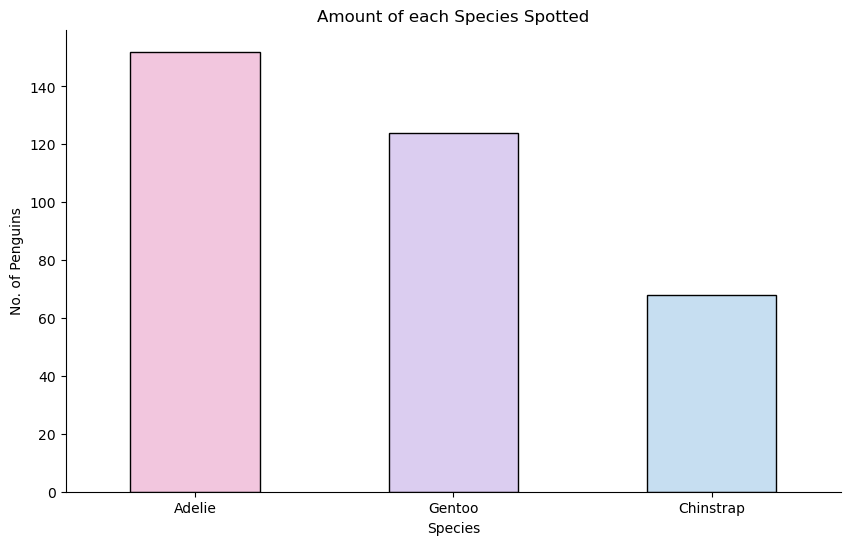

In [21]:
#put it in a bar chart
plt.figure(figsize=(10, 6)) # make it bigger
species_amount.plot(kind = 'bar', color = ['#F2C6DE', '#DBCDF0', '#C6DEF1'], edgecolor='black')
plt.ylabel("No. of Penguins") 
plt.xlabel("Species")
plt.xticks(rotation=0)
plt.title("Amount of each Species Spotted")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


### Create a Histogram of an appropriate Variable
Bill length, bill depth, lipper length, body mass

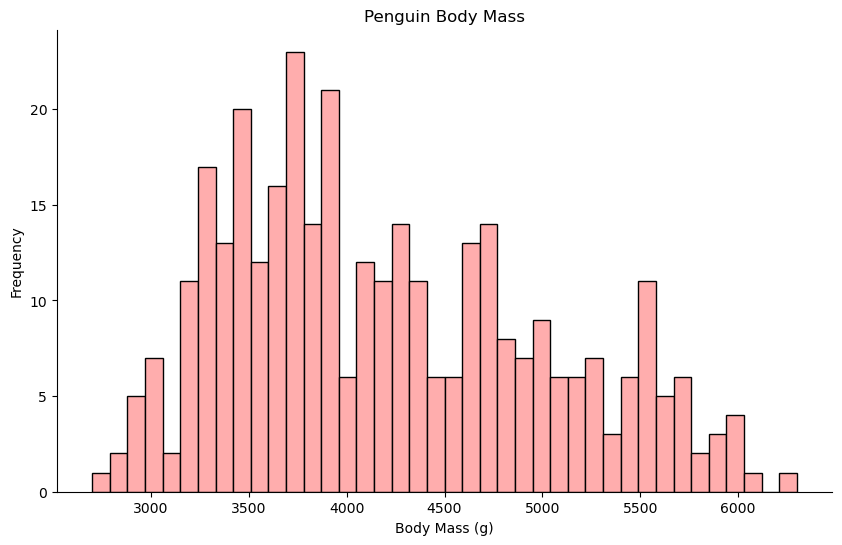

In [22]:
#make a histogram
body_mass = df['body_mass_g']

plt.figure(figsize=(10, 6)) # make it bigger
plt.hist(body_mass, color='#FFADAD', bins=40, edgecolor='black',)
plt.xlabel('Body Mass (g)')
plt.ylabel('Frequency')
plt.title('Penguin Body Mass')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

## Select two variables from the data set and provide an analysis of how correlated they are.

Possible analyses:
-	What is the population of each island?
-	What species inhabit what island?
-	How many of each species of penguin are there?
-	Gender distribution
-	How does species affect bill length & depth, flipper length and body mass. (Within that how does gender affect it?)
-	How many of each species were spotted each year?
-	r/ship between bill length and depth
-	r/ship between body weight and and flipper length


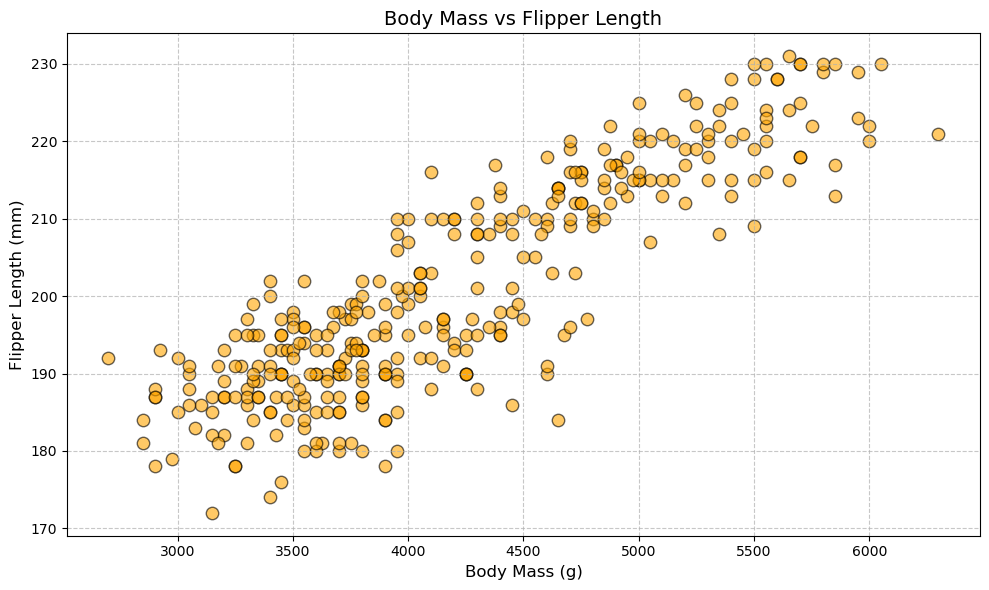

In [26]:
# get the body weight and flipper length from the data, convert to numpy 
bweight = df['body_mass_g'].to_numpy()
flength = df['flipper_length_mm'].to_numpy()

#Add line of best fit

#plot it and make it pretty
plt.figure(figsize=(10, 6))
plt.scatter(bweight, flength, color='orange', alpha=0.6, s=80, edgecolor='black')
plt.xlabel('Body Mass (g)', fontsize=12)
plt.ylabel('Flipper Length (mm)', fontsize=12)
plt.title('Body Mass vs Flipper Length', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

This dataset shows a positive correlation between flippr length and body mass. This means thatthe larger penguins geneally have longer flippers. 

In [ ]:
#Lets have a look
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [ ]:
#describe the data set
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


### Sources

1. Medium article - https://yabdulmalik.medium.com/python-data-analysis-project-palmer-penguins-dataset-411a1e0b8c7d
2. UC Irvine - https://archive.ics.uci.edu/dataset/690/palmer+penguins-3
3. Data Campy - https://www.datacamp.com/tutorial/line-plots-in-matplotlib-with-python



***
### END